In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
%matplotlib inline
from scipy import stats
import re

In [3]:

#function to calculate displacements-per-atom (dpa)
def DPA(E,npka,estop,n,TDE):
    #input E:recoil energy
    #npka:cascade times
    #estop:electronic stopping power,obtained by lammps logfile output stable 'f_elstop'
    #n:number of atoms
    #TDE: lattice dis-placement energy
    #output: dpa value
    Td=E-estop
    return npka*0.8*Td/(2*TDE*n)

In [4]:
TDEO1=16.69665071770335
TDEO2=17.730616302186878
TDEO3=16.35593220338983
TDEGa1=22.164750957854405
TDEGa2=19.410679611650487
mO=15.9994
mGa=69.72
TDEga2o3=((TDEO1+TDEO2+TDEO3)*mO+(TDEGa1+TDEGa2)*mGa)/(2*mGa+3*mO)
TDEga2o3

19.79927110353614

In [49]:
dpaGa=(5/2)*((TDEGa1+TDEGa2)/(TDEGa1+TDEGa2+TDEO1+TDEO2+TDEO3))
dpaGa

1.125380234169324

In [50]:
dpaO=(5/3)*((TDEO1+TDEO2+TDEO3)/((TDEGa1+TDEGa2+TDEO1+TDEO2+TDEO3)))
dpaO

0.9164131772204508

In [95]:
def annealpka(path,gap):
    #check the annealpka list in the dictionary of path
    #input: path
    #input:gap, anneal dataframe every pka gap
    #return anneal pka accumulation number list
    annealf=[fn for fn in os.listdir(path) if any(fn.startswith(ext)for ext in ['anneal.'])]
    numbers = []
    for item in annealf:
        match = re.search(r'\d+', item)
        if match:
            numbers.append(int(match.group()))
    annealpka=np.array(sorted(numbers))
    return (annealpka+1)*gap

In [65]:
path='/home/heruhe/Desktop/Ga2o3/cascade/5type_overlapping/1500ev/out/Gardf'
os.chdir(path)
gammardf=pd.read_csv('gamma', sep=' ',skiprows=1)
gammardf=gammardf[(gammardf.iloc[:, 0] > 4.0) & (gammardf.iloc[:, 0] < 5.2)]
betardf=pd.read_csv('beta', sep=' ',skiprows=1)
betardf=betardf[(betardf.iloc[:, 0] > 4.0) & (betardf.iloc[:, 0] < 5.2)]
pkal1500=[i for i in range(0,2096,50) ]
pka1500anneal=[i for i in range(0,4000,50) ]
print(pkal1500)
pr1500_gamma=np.zeros(len(pkal1500))
pr1500_beta=np.zeros(len(pkal1500))
dpa1500=np.zeros(len(pkal1500))
for i in range(len(pkal1500)):
    dpa1500[i]=DPA(1500,pkal1500[i]+1,193.294,160000,TDEga2o3)
#pearson_anneal1500=np.zeros(len(pkal1500))
for j in range(len(pkal1500)):
#for i in [50]:
    i=pkal1500[j]
    f='pka.'+str(i)
    rdf=pd.read_csv(f, sep=' ',skiprows=1)
    rdf=rdf[(rdf.iloc[:, 0] > 4.0) & (rdf.iloc[:, 0] < 5.2)]
   # plt.plot(rdf.iloc[:,0],rdf.iloc[:,1]+i/100,label=f)    
    #f='anneal'+str(i)+'pka'
    #rdf_anneal=pd.read_csv(f, sep=' ',skiprows=1)
    #rdf_anneal=rdf_anneal[(rdf_anneal.iloc[:, 0] > 4.0) & (rdf_anneal.iloc[:, 0] < 5.2)]
    #plt.plot(rdf_anneal.iloc[:,0],rdf.iloc[:,1]+i/100+0.2,label=f)
    pr1500_gamma[j]=stats.pearsonr(rdf.iloc[:,1], gammardf.iloc[:,1])[0]
    pr1500_beta[j]=stats.pearsonr(rdf.iloc[:,1], betardf.iloc[:,1])[0]
    #pearson_anneal1500[j]=stats.pearsonr(rdf_anneal.iloc[:,1], gammardf.iloc[:,1])[0]
    #plt.legend()

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050]


PKA [750, 800, 850, 900, 950]
dpa: [0.12391065 0.13216036 0.14041007 0.14865978 0.15690949]
gamma [0.70783484 0.73254234 0.75078508 0.76221143 0.79155552]
beta [0.75072102 0.72978085 0.7094903  0.69720689 0.65976524]


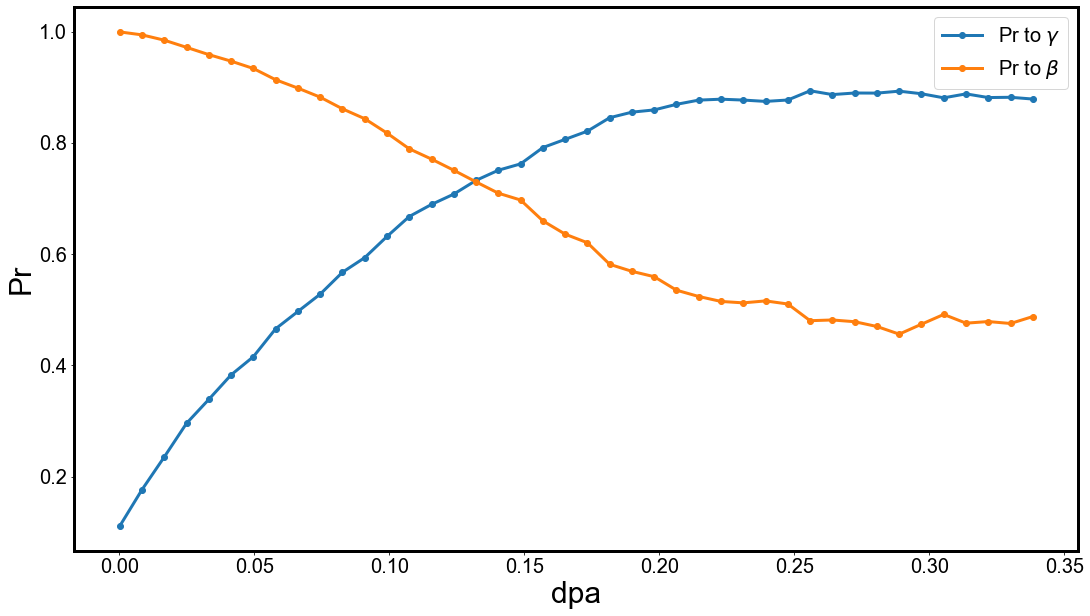

In [60]:
plt.plot(dpa1500, pr1500_gamma,'-o',label=r'Pr to $\gamma$',linewidth=3)
plt.plot(dpa1500, pr1500_beta,'-o',label=r'Pr to $\beta$',linewidth=3)
plt.xlabel('dpa',fontsize=30)
plt.ylabel('Pr',fontsize=30)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["figure.figsize"] = (12,8)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.rcParams["font.family"] = "arial"
print('PKA',pkal1500[15:20])
print('dpa:',dpa1500[15:20])
print('gamma',pr1500_gamma[15:20])
print('beta',pr1500_beta[15:20])

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250]
PKA [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250]
dpa: [1.64994205e-04 8.41470447e-03 1.66644147e-02 2.49141250e-02
 3.31638353e-02 4.14135455e-02 4.96632558e-02 5.79129660e-02
 6.61626763e-02 7.44123866e-02 8.26620968e-02 9.09118071e-02
 9.91615173e-02 1.07411228e-01 1.15660938e-01 1.23910648e-01
 1.32160358e-01 1.40410069e-01 1.48659779e-01 1.56909489e-01
 1.65159199e-01 1.73408910e-01 1.81658620e-01 1.89908330e-01
 1.98158040e-01 2.06407751e-01]
gamma [0.11018906 0.19742981 0.2742289  0.3408031  0.400334   0.47031681
 0.52546525 0.58210915 0.6283542  0.67043174 0.70358257 0.74159267
 0.77482766 0.79849376 0.82489139 0.85258938 0.85954494 0.86918832
 0.88319669 0.88271166 0.88350833 0.8871738  0.88587343 0.87947859
 0.87302501 0.87908439]
beta [0.99948446 0.99231593

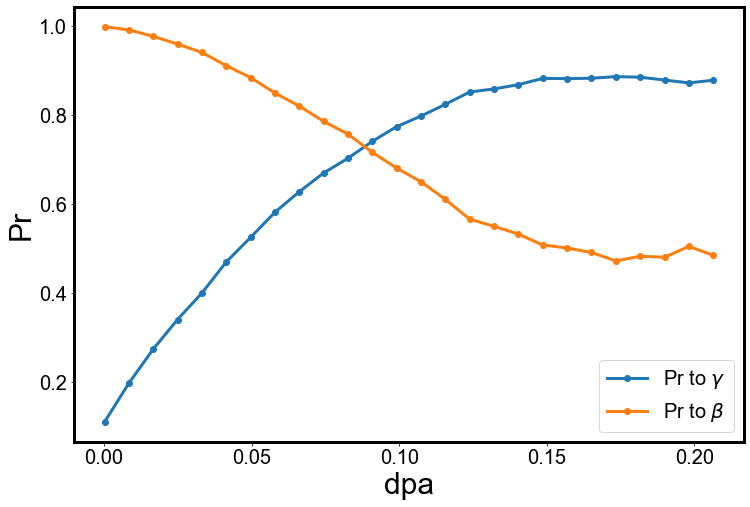

In [72]:
path='/home/heruhe/Desktop/Ga2o3/cascade/5type_overlapping/Ga/1500ev/Gardf'
os.chdir(path)
gammardf=pd.read_csv('gamma', sep=' ',skiprows=1)
gammardf=gammardf[(gammardf.iloc[:, 0] > 4.0) & (gammardf.iloc[:, 0] < 5.2)]
betardf=pd.read_csv('beta', sep=' ',skiprows=1)
betardf=betardf[(betardf.iloc[:, 0] > 4.0) & (betardf.iloc[:, 0] < 5.2)]
pkal1500=[i for i in range(0,1258,50) ]
print(pkal1500)
pr1500_gamma=np.zeros(len(pkal1500))
pr1500_beta=np.zeros(len(pkal1500))
dpa1500=np.zeros(len(pkal1500))
for i in range(len(pkal1500)):
    dpa1500[i]=DPA(1500,pkal1500[i]+1,193.294,160000,TDEga2o3)
#pearson_anneal1500=np.zeros(len(pkal1500))
for j in range(len(pkal1500)):
#for i in [50]:
    i=pkal1500[j]
    f='pka.'+str(i)
    rdf=pd.read_csv(f, sep=' ',skiprows=1)
    rdf=rdf[(rdf.iloc[:, 0] > 4.0) & (rdf.iloc[:, 0] < 5.2)]
   # plt.plot(rdf.iloc[:,0],rdf.iloc[:,1]+i/100,label=f)    
    #f='anneal'+str(i)+'pka'
    #rdf_anneal=pd.read_csv(f, sep=' ',skiprows=1)
    #rdf_anneal=rdf_anneal[(rdf_anneal.iloc[:, 0] > 4.0) & (rdf_anneal.iloc[:, 0] < 5.2)]
    #plt.plot(rdf_anneal.iloc[:,0],rdf.iloc[:,1]+i/100+0.2,label=f)
    pr1500_gamma[j]=stats.pearsonr(rdf.iloc[:,1], gammardf.iloc[:,1])[0]
    pr1500_beta[j]=stats.pearsonr(rdf.iloc[:,1], betardf.iloc[:,1])[0]
    #pearson_anneal1500[j]=stats.pearsonr(rdf_anneal.iloc[:,1], gammardf.iloc[:,1])[0]
    #plt.legend()
plt.plot(dpa1500, pr1500_gamma,'-o',label=r'Pr to $\gamma$',linewidth=3)
plt.plot(dpa1500, pr1500_beta,'-o',label=r'Pr to $\beta$',linewidth=3)
plt.xlabel('dpa',fontsize=30)
plt.ylabel('Pr',fontsize=30)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["figure.figsize"] = (12,8)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.rcParams["font.family"] = "arial"
print('PKA',pkal1500)
print('dpa:',dpa1500)
print('gamma',pr1500_gamma)
print('beta',pr1500_beta)

In [87]:
path='/home/heruhe/Desktop/Ga2o3/cascade/5type_overlapping/Ga/1500ev/Gardf'
os.chdir(path)

In [90]:
annealf=[fn for fn in os.listdir(path) if any(fn.startswith(ext)for ext in ['anneal.'])]
numbers = []
for item in annealf:
    match = re.search(r'\d+', item)
    if match:
        numbers.append(int(match.group()))
annealpka=sorted(numbers)
print(annealpka)
#print(annealpka)
anneal1500dpa=np.zeros(len(annealpka))
for i in range(len(annealpka)):
    anneal1500dpa[i]=DPA(1500,annealpka[i]+1,193.294,160000,TDEga2o3)
    #print(annealpka[i]+1,anneal1500dpa[i])
Pr_anneal1500_gamma=np.zeros(len(annealpka))
Pr_anneal1500_beta=np.zeros(len(annealpka))
for i in range(len(annealpka)):
    f=annealpka[i]
    fn='anneal.'+str(f)
    rdf=pd.read_csv(fn, sep=' ',skiprows=1)
    rdf=rdf[(rdf.iloc[:, 0] > 4.0) & (rdf.iloc[:, 0] < 5.2)]
    Pr_anneal1500_gamma[i]=stats.pearsonr(rdf.iloc[:,1], gammardf.iloc[:,1])[0]
    Pr_anneal1500_beta[i]=stats.pearsonr(rdf.iloc[:,1], betardf.iloc[:,1])[0]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [91]:
annealpka=(np.array(annealpka)+1)*100
annealpka
anneal1500dpa=np.zeros(len(annealpka))
for i in range(len(annealpka)):
    anneal1500dpa[i]=DPA(1500,annealpka[i]+1,193.294,160000,TDEga2o3)
    #print(annealpka[i]+1,anneal1500dpa[i])


PKA [1000 1100 1200]
dpa: [0.1651592  0.18165862 0.19815804]
gamma [0.84977275 0.84653133 0.84468679]
beta [0.5739059  0.55791421 0.56637404]


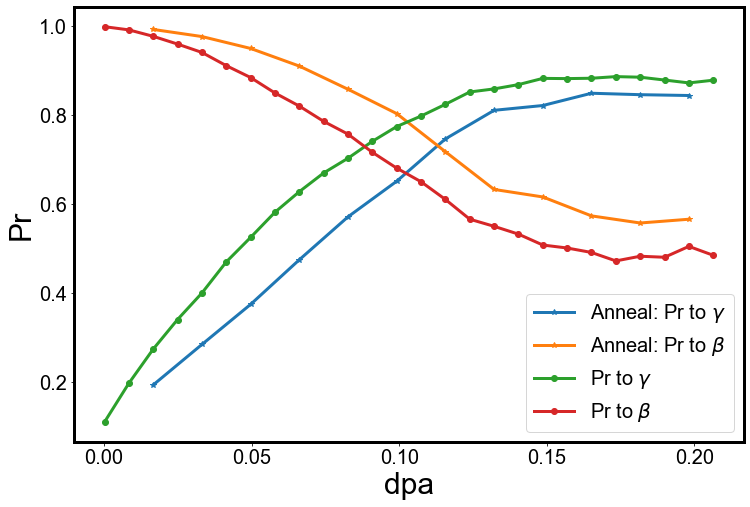

In [92]:
plt.plot(anneal1500dpa, Pr_anneal1500_gamma,'-*',label=r'Anneal: Pr to $\gamma$',linewidth=3)
plt.plot(anneal1500dpa, Pr_anneal1500_beta,'-*',label=r'Anneal: Pr to $\beta$',linewidth=3)
plt.plot(dpa1500, pr1500_gamma,'-o',label=r'Pr to $\gamma$',linewidth=3)
plt.plot(dpa1500, pr1500_beta,'-o',label=r'Pr to $\beta$',linewidth=3)
plt.xlabel('dpa',fontsize=30)
plt.ylabel('Pr',fontsize=30)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["figure.figsize"] = (12,8)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.rcParams["font.family"] = "arial"
print('PKA',annealpka[9:13])
print('dpa:',anneal1500dpa[9:13])
print('gamma',Pr_anneal1500_gamma[9:13])
print('beta',Pr_anneal1500_beta[9:13])

In [67]:
pr500anneal_gamma=np.zeros(len(annealpka))
pr500anneal_beta=np.zeros(len(annealpka))
for j in range(len(annealpka)):
    f=annealf[j]
    rdf=pd.read_csv(f, sep=' ',skiprows=1)
    rdf=rdf[(rdf.iloc[:, 0] > 4.0) & (rdf.iloc[:, 0] < 5.2)]
    #plt.plot(rdf.iloc[:,0],rdf.iloc[:,1]+i/100,label=f)    
    pr500anneal_gamma[j]=stats.pearsonr(rdf.iloc[:,1], gammardf.iloc[:,1])[0]
    pr500anneal_beta[j]=stats.pearsonr(rdf.iloc[:,1], betardf.iloc[:,1])[0]


In [69]:
path='/home/heruhe/Desktop/Ga2o3/cascade/5type_overlapping/500ev/out/Gardf'
os.chdir(path)
gammardf=pd.read_csv('gamma', sep=' ',skiprows=1)
gammardf=gammardf[(gammardf.iloc[:, 0] > 4.0) & (gammardf.iloc[:, 0] < 5.2)]
betardf=pd.read_csv('beta', sep=' ',skiprows=1)
betardf=betardf[(betardf.iloc[:, 0] > 4.0) & (betardf.iloc[:, 0] < 5.2)]
pkal500=[i for i in range(0,4181,50) ]
print(pkal500)
pr500_gamma=np.zeros(len(pkal500))
pr500_beta=np.zeros(len(pkal500))
dpa500=np.zeros(len(pkal500))
for i in range(len(pkal500)):
    dpa500[i]=DPA(500,pkal500[i]+1,63.563,81920,TDEga2o3)
dpa500
for j in range(len(pkal500)):
    i=pkal500[j]
    f='pka.'+str(i)
    rdf=pd.read_csv(f, sep=' ',skiprows=1)
    rdf=rdf[(rdf.iloc[:, 0] > 4.0) & (rdf.iloc[:, 0] < 5.2)]
    #plt.plot(rdf.iloc[:,0],rdf.iloc[:,1]+i/100,label=f)    
    pr500_gamma[j]=stats.pearsonr(rdf.iloc[:,1], gammardf.iloc[:,1])[0]
    pr500_beta[j]=stats.pearsonr(rdf.iloc[:,1], betardf.iloc[:,1])[0]


[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100, 2150, 2200, 2250, 2300, 2350, 2400, 2450, 2500, 2550, 2600, 2650, 2700, 2750, 2800, 2850, 2900, 2950, 3000, 3050, 3100, 3150, 3200, 3250, 3300, 3350, 3400, 3450, 3500, 3550, 3600, 3650, 3700, 3750, 3800, 3850, 3900, 3950, 4000, 4050, 4100, 4150]


pka [1500, 1550, 1600, 1650, 1700]
dpa: [0.161556   0.16693762 0.17231923 0.17770084 0.18308245]
gamma [0.69134982 0.72478054 0.72500843 0.73090088 0.74818448]
beta [0.77002848 0.73545186 0.73547728 0.72937684 0.71506641]
pka [1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700]
dpa: [0.10773988 0.11312149 0.1185031  0.12388472 0.12926633 0.13464794
 0.14002955 0.14541117 0.15079278 0.15617439 0.161556   0.16693762
 0.17231923 0.17770084 0.18308245]


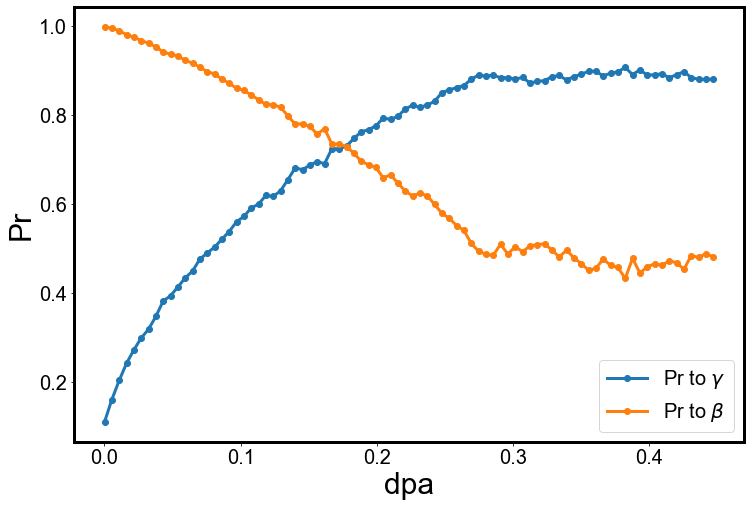

In [70]:
plt.plot(dpa500, pr500_gamma,'-o',label=r'Pr to $\gamma$',linewidth=3)
plt.plot(dpa500, pr500_beta,'-o',label=r'Pr to $\beta$',linewidth=3)
plt.xlabel('dpa',fontsize=30)
plt.ylabel('Pr',fontsize=30)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["figure.figsize"] = (12,8)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.rcParams["font.family"] = "arial"
print('pka',pkal500[30:35])
print('dpa:',dpa500[30:35])
print('gamma',pr500_gamma[30:35])
print('beta',pr500_beta[30:35])
print('pka',pkal500[20:35])
print('dpa:',dpa500[20:35])

PKA [2117, 2317, 2517]
dpa: [0.2279651  0.24949155 0.271018  ]
gamma [0.70032321 0.75660497 0.81163063]
beta [0.76152062 0.70123381 0.63878313]


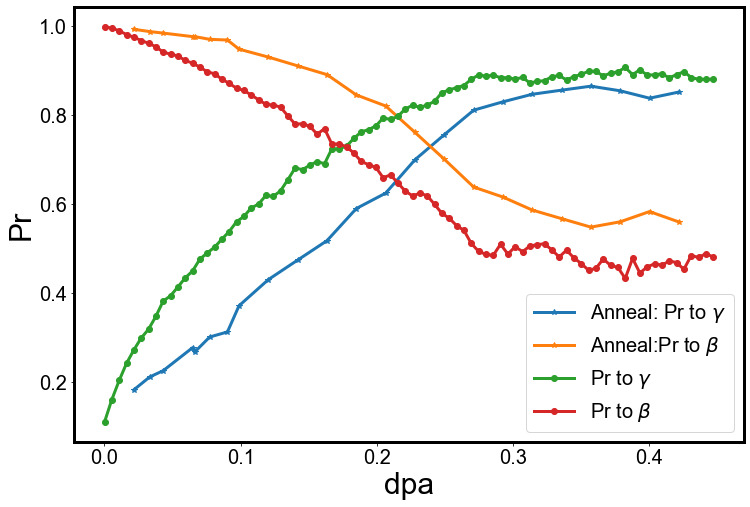

In [71]:
path='/home/heruhe/Desktop/Ga2o3/cascade/5type_overlapping/500ev/out/Gardf'
os.chdir(path)
annealf=[fn for fn in os.listdir(path) if any(fn.startswith(ext)for ext in ['anneal.'])]
numbers = []
for item in annealf:
    match = re.search(r'\d+', item)
    if match:
        numbers.append(int(match.group()))
annealpka=sorted(numbers)
#print(annealpka)
anneal500dpa=np.zeros(len(annealpka))
for i in range(len(annealpka)):
    anneal500dpa[i]=DPA(500,annealpka[i]+1,63.563,81920,TDEga2o3)
    #print(annealpka[i]+1,anneal500dpa[i])
Pr_anneal500_gamma=np.zeros(len(annealpka))
Pr_anneal500_beta=np.zeros(len(annealpka))
for i in range(len(annealpka)):
    f=annealpka[i]
    fn='anneal.'+str(f)
    rdf=pd.read_csv(fn, sep=' ',skiprows=1)
    rdf=rdf[(rdf.iloc[:, 0] > 4.0) & (rdf.iloc[:, 0] < 5.2)]
    Pr_anneal500_gamma[i]=stats.pearsonr(rdf.iloc[:,1], gammardf.iloc[:,1])[0]
    Pr_anneal500_beta[i]=stats.pearsonr(rdf.iloc[:,1], betardf.iloc[:,1])[0]
plt.plot(anneal500dpa, Pr_anneal500_gamma,'-*',label=r'Anneal: Pr to $\gamma$',linewidth=3)
plt.plot(anneal500dpa, Pr_anneal500_beta,'-*',label=r'Anneal:Pr to $\beta$',linewidth=3)
plt.plot(dpa500, pr500_gamma,'-o',label=r'Pr to $\gamma$',linewidth=3)
plt.plot(dpa500, pr500_beta,'-o',label=r'Pr to $\beta$',linewidth=3)
plt.xlabel('dpa',fontsize=30)
plt.ylabel('Pr',fontsize=30)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["figure.figsize"] = (12,8)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.rcParams["font.family"] = "arial"
print('PKA',annealpka[13:16])
print('dpa:',anneal500dpa[13:16])
print('gamma',Pr_anneal500_gamma[13:16])
print('beta',Pr_anneal500_beta[13:16])

In [241]:
for i in range(2000):
    dpa500=DPA(500,i+1,63.563,81920,TDEga2o3)
    dpa1500=DPA(1500,i+1,193.294,160000,TDEga2o3)
    if abs(dpa500-0.05)<abs(0.0001):
        print('500',i,dpa500)
    if abs(dpa1500-0.05)<abs(0.0001):
        print('1500',i,dpa1500)

1500 302 0.04999324418681337
500 463 0.049941362636748816
500 464 0.05004899488381077


In [210]:
for i in range(2000):
    dpa500=DPA(500,i+1,63.563,81920,TDEga2o3)
    dpa1500=DPA(1500,i+1,193.294,160000,TDEga2o3)
    if abs(dpa500-0.1)<abs(0.0001):
        print('500',i,dpa500)
    if abs(dpa1500-0.1)<abs(0.0001):
        print('1500',i,dpa1500)

1500 605 0.09998648837362674
500 928 0.09999035752055957
500 929 0.10009798976762153


In [211]:
for i in range(2000):
    dpa500=DPA(500,i+1,63.563,81920,TDEga2o3)
    dpa1500=DPA(1500,i+1,193.294,160000,TDEga2o3)
    if abs(dpa500-0.2)<abs(0.0001):
        print('500',i,dpa500)
    if abs(dpa1500-0.2)<abs(0.0001):
        print('1500',i,dpa1500)

1500 1211 0.19997297674725348
500 1857 0.19998071504111914
500 1858 0.2000883472881811


In [258]:
path='/home/heruhe/Desktop/Ga2o3/cascade/5type_overlapping/500ev/out/rdf'
os.chdir(path)
Ordf500_005=pd.read_csv('O-O.pka463', sep=' ',skiprows=1)
Ordf500_01=pd.read_csv('O-O.pka928', sep=' ',skiprows=1)
Oanneal500_01=pd.read_csv('annealO-O.pka917', sep=' ',skiprows=1)
Ordf500_02=pd.read_csv('O-O.pka1857', sep=' ',skiprows=1)
Obeta=pd.read_csv('O-O.beta', sep=' ',skiprows=1)

After 2160PKA: 0.5698798550632566
Anneal after 2000PKA: 0.9544064129320253
After 500PKA: 0.9685243833020623
Anneal after 500PKA: 0.9866357512174215


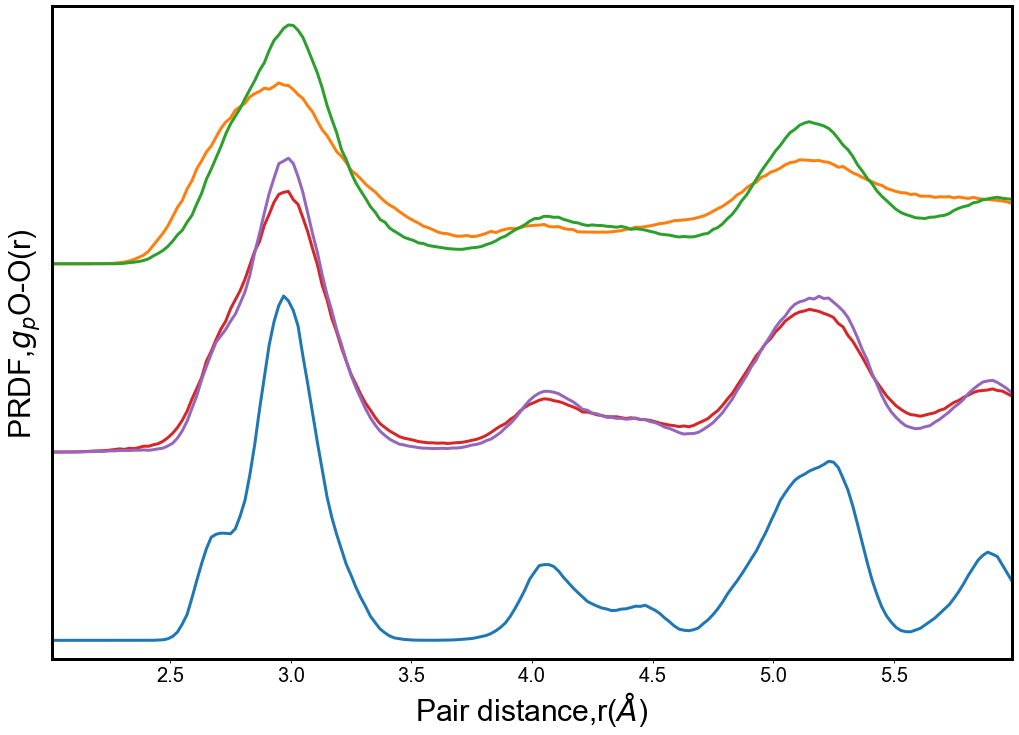

In [141]:
path='/home/heruhe/Desktop/Ga2o3/cascade/5type_overlapping/1500ev/out/Ordf'
os.chdir(path)
beta=pd.read_csv('beta', sep=' ',skiprows=1)
plt.plot(beta.iloc[100:,0],beta.iloc[100:,1]-6,linewidth=3)
beta=beta[(beta.iloc[:, 0] > 3.6) & (beta.iloc[:, 0] < 4.6)]

Ordf1500=pd.read_csv('pka.2160', sep=' ',skiprows=1)
Oanneal1500=pd.read_csv('anneal.2160', sep=' ',skiprows=1)
plt.plot(Ordf1500.iloc[100:,0],Ordf1500.iloc[100:,1],linewidth=3)
plt.plot(Oanneal1500.iloc[100:,0],Oanneal1500.iloc[100:,1],linewidth=3)
Ordf1500=Ordf1500[(Ordf1500.iloc[:, 0] > 3.6) & (Ordf1500.iloc[:, 0] < 4.6)]
print('After 2160PKA:',stats.pearsonr(Ordf1500.iloc[:,1], beta.iloc[:,1])[0])
Oanneal1500=Oanneal1500[(Oanneal1500.iloc[:, 0] > 3.6) & (Oanneal1500.iloc[:, 0] < 4.6)]
print('Anneal after 2000PKA:',stats.pearsonr(Oanneal1500.iloc[:,1], beta.iloc[:,1])[0])
Ordf1500=pd.read_csv('pka.500', sep=' ',skiprows=1)
Oanneal1500=pd.read_csv('anneal.4', sep=' ',skiprows=1)
plt.plot(Ordf1500.iloc[100:,0],Ordf1500.iloc[100:,1]-3,linewidth=3)
plt.plot(Oanneal1500.iloc[100:,0],Oanneal1500.iloc[100:,1]-3,linewidth=3)
Ordf1500=Ordf1500[(Ordf1500.iloc[:, 0] > 3.6) & (Ordf1500.iloc[:, 0] < 4.6)]
print('After 500PKA:',stats.pearsonr(Ordf1500.iloc[:,1], beta.iloc[:,1])[0])
Oanneal1500=Oapath='/home/heruhe/Desktop/Ga2o3/cascade/5type_overlapping/1500ev/out/Ordf'
os.chdir(path)
beta=pd.read_csv('beta', sep=' ',skiprows=1)
plt.plot(beta.iloc[100:,0],beta.iloc[100:,1]-6,linewidth=3)
beta=beta[(beta.iloc[:, 0] > 3.6) & (beta.iloc[:, 0] < 4.6)]

Ordf1500=pd.read_csv('pka.2160', sep=' ',skiprows=1)
Oanneal1500=pd.read_csv('anneal.2160', sep=' ',skiprows=1)
plt.plot(Ordf1500.iloc[100:,0],Ordf1500.iloc[100:,1],linewidth=3)
plt.plot(Oanneal1500.iloc[100:,0],Oanneal1500.iloc[100:,1],linewidth=3)
Ordf1500=Ordf1500[(Ordf1500.iloc[:, 0] > 3.6) & (Ordf1500.iloc[:, 0] < 4.6)]
print('After 2160PKA:',stats.pearsonr(Ordf1500.iloc[:,1], beta.iloc[:,1])[0])
Oanneal1500=Oanneal1500[(Oanneal1500.iloc[:, 0] > 3.6) & (Oanneal1500.iloc[:, 0] < 4.6)]
print('Anneal after 2000PKA:',stats.pearsonr(Oanneal1500.iloc[:,1], beta.iloc[:,1])[0])
Ordf1500=pd.read_csv('pka.500', sep=' ',skiprows=1)
Oanneal1500=pd.read_csv('anneal.4', sep=' ',skiprows=1)
plt.plot(Ordf1500.iloc[100:,0],Ordf1500.iloc[100:,1]-3,linewidth=3)
plt.plot(Oanneal1500.iloc[100:,0],Oanneal1500.iloc[100:,1]-3,linewidth=3)
Ordf1500=Ordf1500[(Ordf1500.iloc[:, 0] > 3.6) & (Ordf1500.iloc[:, 0] < 4.6)]
print('After 500PKA:',stats.pearsonr(Ordf1500.iloc[:,1], beta.iloc[:,1])[0])
Oanneal1500=Oanneal1500[(Oanneal1500.iloc[:, 0] > 3.6) & (Oanneal1500.iloc[:, 0] < 4.6)]
print('Anneal after 500PKA:',stats.pearsonr(Oanneal1500.iloc[:,1], beta.iloc[:,1])[0])
plt.xlabel('Pair distance,r($\AA$)',fontsize=30)
plt.ylabel('PRDF,gpO-O(r))',fontsize=30)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["figure.figsize"] = (17.2,12)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.yticks([])
plt.margins(x=0)
plt.margins(y=0.03)
plt.ylabel('PRDF,$g_{p}$O-O(r)', labelpad=10, fontsize=30)
plt.rcParams["font.family"] = "arial"nneal1500[(Oanneal1500.iloc[:, 0] > 3.6) & (Oanneal1500.iloc[:, 0] < 4.6)]
print('Anneal after 500PKA:',stats.pearsonr(Oanneal1500.iloc[:,1], beta.iloc[:,1])[0])
plt.xlabel('Pair distance,r($\AA$)',fontsize=30)
plt.ylabel('PRDF,gpO-O(r))',fontsize=30)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["figure.figsize"] = (17.2,12)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.yticks([])
plt.margins(x=0)
plt.margins(y=0.03)
plt.ylabel('PRDF,$g_{p}$O-O(r)', labelpad=10, fontsize=30)
plt.rcParams["font.family"] = "arial"

After 2160PKA: 0.4808995365789403
Anneal after 2000PKA: 0.5831323769291866
After 500PKA: 0.8612192820860846
Anneal after 500PKA: 0.9466576652142202


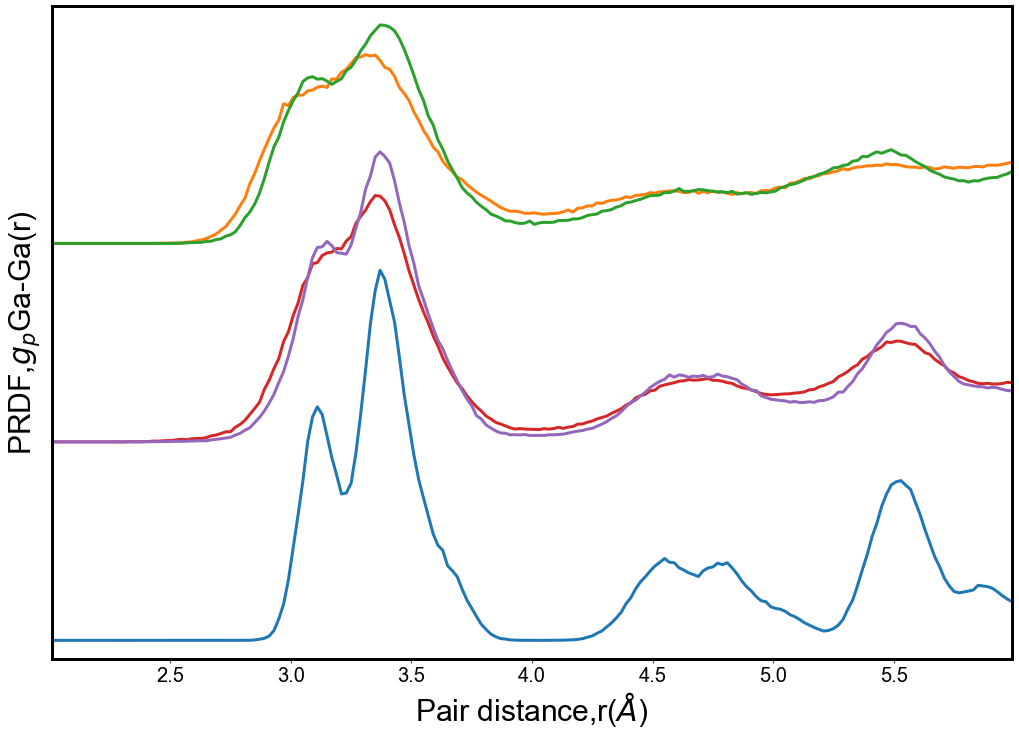

In [145]:
path='/home/heruhe/Desktop/Ga2o3/cascade/5type_overlapping/1500ev/out/Gardf'
os.chdir(path)
beta=pd.read_csv('beta', sep=' ',skiprows=1)
plt.plot(beta.iloc[100:,0],beta.iloc[100:,1]-6,linewidth=3)
beta=beta[(beta.iloc[:, 0] > 4.0) & (beta.iloc[:, 0] < 5.2)]

Ordf1500=pd.read_csv('pka.2160', sep=' ',skiprows=1)
Oanneal1500=pd.read_csv('anneal.2160', sep=' ',skiprows=1)
plt.plot(Ordf1500.iloc[100:,0],Ordf1500.iloc[100:,1],linewidth=3)
plt.plot(Oanneal1500.iloc[100:,0],Oanneal1500.iloc[100:,1],linewidth=3)
Ordf1500=Ordf1500[(Ordf1500.iloc[:, 0] > 4.0) & (Ordf1500.iloc[:, 0] < 5.2)]
print('After 2160PKA:',stats.pearsonr(Ordf1500.iloc[:,1], beta.iloc[:,1])[0])
Oanneal1500=Oanneal1500[(Oanneal1500.iloc[:, 0] > 4.0) & (Oanneal1500.iloc[:, 0] < 5.2)]
print('Anneal after 2000PKA:',stats.pearsonr(Oanneal1500.iloc[:,1], beta.iloc[:,1])[0])
Ordf1500=pd.read_csv('pka.500', sep=' ',skiprows=1)
Oanneal1500=pd.read_csv('anneal.500', sep=' ',skiprows=1)
plt.plot(Ordf1500.iloc[100:,0],Ordf1500.iloc[100:,1]-3,linewidth=3)
plt.plot(Oanneal1500.iloc[100:,0],Oanneal1500.iloc[100:,1]-3,linewidth=3)
Ordf1500=Ordf1500[(Ordf1500.iloc[:, 0] > 4.0) & (Ordf1500.iloc[:, 0] < 5.2)]
print('After 500PKA:',stats.pearsonr(Ordf1500.iloc[:,1], beta.iloc[:,1])[0])
Oanneal1500=Oanneal1500[(Oanneal1500.iloc[:, 0] > 4.0) & (Oanneal1500.iloc[:, 0] < 5.2)]
print('Anneal after 500PKA:',stats.pearsonr(Oanneal1500.iloc[:,1], beta.iloc[:,1])[0])
plt.xlabel('Pair distance,r($\AA$)',fontsize=30)
plt.ylabel('PRDF,gpO-O(r))',fontsize=30)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["figure.figsize"] = (17.2,12)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.yticks([])
plt.margins(x=0)
plt.margins(y=0.03)
plt.ylabel('PRDF,$g_{p}$Ga-Ga(r)', labelpad=10, fontsize=30)
plt.rcParams["font.family"] = "arial"

In [265]:
stats.pearsonr(Ordf500_005.iloc[153:200,1], Obeta.iloc[153:200,1])[0]

0.9747708413365079

In [272]:
stats.pearsonr(Ordf1500_005.iloc[153:200,1], Obeta.iloc[153:200,1])[0]

0.9765868236181089

In [271]:
print(stats.pearsonr(Ordf500_01.iloc[153:200,1], Obeta.iloc[153:200,1])[0])
print('anneal',stats.pearsonr(Oanneal500_01.iloc[153:200,1], Obeta.iloc[153:200,1])[0])

0.9655391009352926
anneal 0.987502977894999


In [273]:
print(stats.pearsonr(Ordf1500_01.iloc[153:200,1], Obeta.iloc[153:200,1])[0])
print('anneal',stats.pearsonr(Oanneal1500_01.iloc[153:200,1], Obeta.iloc[153:200,1])[0])

0.9571217326988447
anneal 0.9789821017766455


In [267]:
stats.pearsonr(Ordf500_02.iloc[153:200,1], Obeta.iloc[153:200,1])[0]

0.9381409406761616

In [274]:
stats.pearsonr(Ordf1500_02.iloc[153:200,1], Obeta.iloc[153:200,1])[0]

0.9096837211694263

In [277]:
stats.pearsonr(armorphousO.iloc[153:200,1], Obeta.iloc[153:200,1])[0]

-0.5079023739892597

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100, 2150, 2200, 2250, 2300, 2350, 2400, 2450, 2500, 2550, 2600, 2650, 2700, 2750, 2800, 2850, 2900, 2950, 3000, 3050, 3100, 3150, 3200, 3250, 3300, 3350, 3400, 3450, 3500, 3550, 3600, 3650, 3700]
['anneal.1', 'anneal.9', 'anneal.12', 'anneal.11', 'anneal.2', 'anneal.3', 'anneal.13', 'anneal.8', 'anneal.15', 'anneal.6', 'anneal.16', 'anneal.19', 'anneal.18', 'anneal.4', 'anneal.0', 'anneal.7', 'anneal.14', 'anneal.5', 'anneal.17', 'anneal.10']


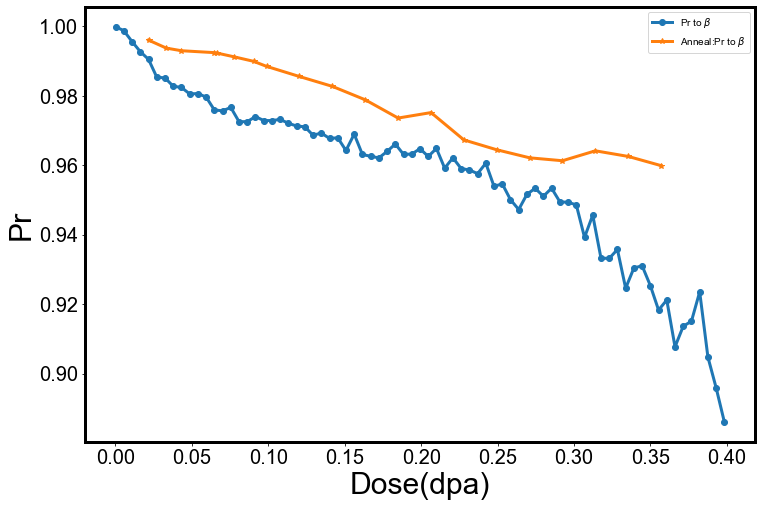

In [94]:
# O RDF analysis
path='/home/heruhe/Desktop/Ga2o3/cascade/5type_overlapping/500ev/out/Ordf'
os.chdir(path)
#gammardf=pd.read_csv('gamma', sep=' ',skiprows=1)
#gammardf=gammardf[(gammardf.iloc[:, 0] > 4.0) & (gammardf.iloc[:, 0] < 5.2)]
betardf=pd.read_csv('beta', sep=' ',skiprows=1)
betardf=betardf[(betardf.iloc[:, 0] > 3.6) & (betardf.iloc[:, 0] < 4.6)]
pkal500=[i for i in range(0,3708,50) ]
print(pkal500)
#pr500_gamma=np.zeros(len(pkal500))
pr500_beta=np.zeros(len(pkal500))
dpa500=np.zeros(len(pkal500))
for i in range(len(pkal500)):
    dpa500[i]=DPA(500,pkal500[i]+1,63.563,81920,TDEga2o3)
for j in range(len(pkal500)):
    i=pkal500[j]
    f='pka.'+str(i)
    rdf=pd.read_csv(f, sep=' ',skiprows=1)
    rdf=rdf[(rdf.iloc[:, 0] > 3.6) & (rdf.iloc[:, 0] < 4.6)]
    #plt.plot(rdf.iloc[:,0],rdf.iloc[:,1]+i/100,label=f)    
    #pr500_gamma[j]=stats.pearsonr(rdf.iloc[:,1], gammardf.iloc[:,1])[0]
    pr500_beta[j]=stats.pearsonr(rdf.iloc[:,1], betardf.iloc[:,1])[0]
#plt.plot(dpa500, pr500_gamma,'-o',label=r'Pr to $\gamma$',linewidth=3)
plt.plot(dpa500, pr500_beta,'-o',label=r'Pr to $\beta$',linewidth=3)
plt.xlabel('Dose(dpa)',fontsize=30)
plt.ylabel('Pr',fontsize=30)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["figure.figsize"] = (12,8)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.rcParams["font.family"] = "arial"
#anneal O PRDFs
annealf=[fn for fn in os.listdir(path) if any(fn.startswith(ext)for ext in ['anneal.'])]
Pr_anneal500_beta=np.zeros(len(annealf))
print(annealf)
for i in range(len(annealf)):
    fn='anneal.'+str(i)
    rdf=pd.read_csv(fn, sep=' ',skiprows=1)
    rdf=rdf[(rdf.iloc[:, 0] > 3.6) & (rdf.iloc[:, 0] < 4.6)]
    #Pr_anneal500_gamma[i]=stats.pearsonr(rdf.iloc[:,1], gammardf.iloc[:,1])[0]
    Pr_anneal500_beta[i]=stats.pearsonr(rdf.iloc[:,1], betardf.iloc[:,1])[0]
plt.plot(anneal500dpa, Pr_anneal500_beta,'-*',label=r'Anneal:Pr to $\beta$',linewidth=3)
plt.legend()


[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900]
17


NameError: name 'anneal1500dpa' is not defined

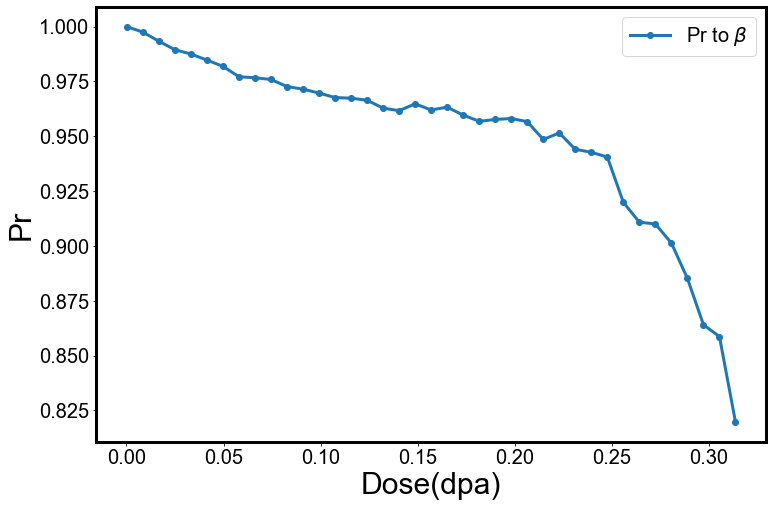

In [7]:
# O RDF analysis
path='/home/heruhe/Desktop/Ga2o3/cascade/5type_overlapping/1500ev/out/Ordf'
os.chdir(path)
#gammardf=pd.read_csv('gamma', sep=' ',skiprows=1)
#gammardf=gammardf[(gammardf.iloc[:, 0] > 4.0) & (gammardf.iloc[:, 0] < 5.2)]
betardf=pd.read_csv('beta', sep=' ',skiprows=1)
betardf=betardf[(betardf.iloc[:, 0] > 3.6) & (betardf.iloc[:, 0] < 4.6)]
pkal1500=[i for i in range(0,1908,50) ]
print(pkal1500)
#pr1500_gamma=np.zeros(len(pkal1500))
pr1500_beta=np.zeros(len(pkal1500))
dpa1500=np.zeros(len(pkal1500))
for i in range(len(pkal1500)):
    dpa1500[i]=DPA(1500,pkal1500[i]+1,193.294,160000,TDEga2o3)
for j in range(len(pkal1500)):
    i=pkal1500[j]
    f='pka.'+str(i)
    rdf=pd.read_csv(f, sep=' ',skiprows=1)
    rdf=rdf[(rdf.iloc[:, 0] > 3.6) & (rdf.iloc[:, 0] < 4.6)]
    #plt.plot(rdf.iloc[:,0],rdf.iloc[:,1]+i/100,label=f)    
    #pr1500_gamma[j]=stats.pearsonr(rdf.iloc[:,1], gammardf.iloc[:,1])[0]
    pr1500_beta[j]=stats.pearsonr(rdf.iloc[:,1], betardf.iloc[:,1])[0]
#plt.plot(dpa1500, pr1500_gamma,'-o',label=r'Pr to $\gamma$',linewidth=3)
plt.plot(dpa1500, pr1500_beta,'-o',label=r'Pr to $\beta$',linewidth=3)
plt.xlabel('Dose(dpa)',fontsize=30)
plt.ylabel('Pr',fontsize=30)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["figure.figsize"] = (12,8)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.rcParams["font.family"] = "arial"
#anneal O PRDFs
annealf=[fn for fn in os.listdir(path) if any(fn.startswith(ext)for ext in ['anneal.'])]
Pr_anneal1500_beta=np.zeros(len(annealf))
print(len(annealf))
for i in range(len(annealf)):
    fn='anneal.'+str(i)
    rdf=pd.read_csv(fn, sep=' ',skiprows=1)
    rdf=rdf[(rdf.iloc[:, 0] > 3.6) & (rdf.iloc[:, 0] < 4.6)]
    #Pr_anneal1500_gamma[i]=stats.pearsonr(rdf.iloc[:,1], gammardf.iloc[:,1])[0]
    Pr_anneal1500_beta[i]=stats.pearsonr(rdf.iloc[:,1], betardf.iloc[:,1])[0]
plt.plot(anneal1500dpa, Pr_anneal1500_beta,'-*',label=r'Anneal:Pr to $\beta$',linewidth=3)
plt.legend(fontsize=30)

[ 201  309  401  601  615  718  839  918 1118 1318 1518 1718 1918 2118
 2318 2518 2717 2917 3117 3317 3517 3717 3917 4117]


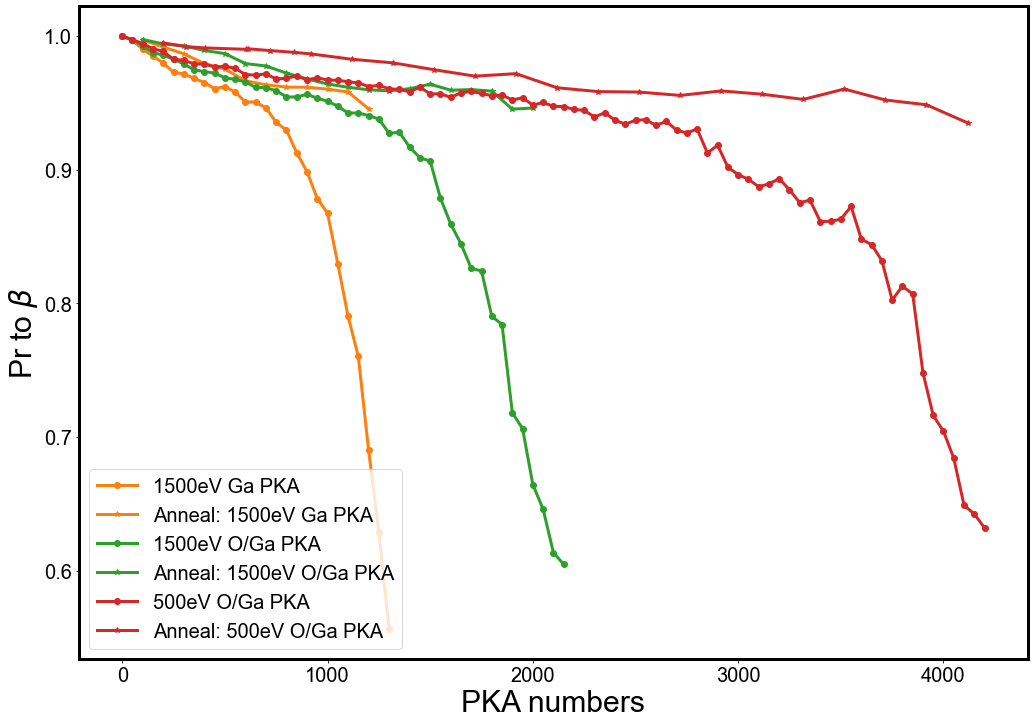

In [139]:
# O RDF analysis
path='/home/heruhe/Desktop/Ga2o3/cascade/5type_overlapping/Ga/1500ev/Ordf'
os.chdir(path)
#gammardf=pd.read_csv('gamma', sep=' ',skiprows=1)
#gammardf=gammardf[(gammardf.iloc[:, 0] > 4.0) & (gammardf.iloc[:, 0] < 5.2)]
betardf=pd.read_csv('beta', sep=' ',skiprows=1)
betardf=betardf[(betardf.iloc[:, 0] > 3.6) & (betardf.iloc[:, 0] < 4.6)]
pkal1500=[i for i in range(0,1311,50) ]
#pr1500_gamma=np.zeros(len(pkal1500))
pr1500_beta=np.zeros(len(pkal1500))
dpa1500=np.zeros(len(pkal1500))
for i in range(len(pkal1500)):
    dpa1500[i]=DPA(1500,pkal1500[i]+1,193.294,160000,TDEga2o3)
for j in range(len(pkal1500)):
    i=pkal1500[j]
    f='pka.'+str(i)
    rdf=pd.read_csv(f, sep=' ',skiprows=1)
    rdf=rdf[(rdf.iloc[:, 0] > 3.6) & (rdf.iloc[:, 0] < 4.6)]
    #plt.plot(rdf.iloc[:,0],rdf.iloc[:,1]+i/100,label=f)    
    #pr1500_gamma[j]=stats.pearsonr(rdf.iloc[:,1], gammardf.iloc[:,1])[0]
    pr1500_beta[j]=stats.pearsonr(rdf.iloc[:,1], betardf.iloc[:,1])[0]
#plt.plot(dpa1500, pr1500_beta,'-o',label=r'1500eV Ga PKA',linewidth=3)
plt.plot(pkal1500, pr1500_beta,'-o',label=r'1500eV Ga PKA',linewidth=3,color='C1')
#anneal
annealpka1500=annealpka(path,100)
Pr_anneal1500_beta=np.zeros(len(annealpka1500))
for i in range(len(annealpka1500)):
    fn='anneal.'+str(i)
    rdf=pd.read_csv(fn, sep=' ',skiprows=1)
    rdf=rdf[(rdf.iloc[:, 0] > 3.6) & (rdf.iloc[:, 0] < 4.6)]
    #Pr_anneal1500_gamma[i]=stats.pearsonr(rdf.iloc[:,1], gammardf.iloc[:,1])[0]
    Pr_anneal1500_beta[i]=stats.pearsonr(rdf.iloc[:,1], betardf.iloc[:,1])[0]
plt.plot(annealpka1500, Pr_anneal1500_beta,'-*',label=r'Anneal: 1500eV Ga PKA',linewidth=3,color='C1')

# O RDF analysis
path='/home/heruhe/Desktop/Ga2o3/cascade/5type_overlapping/1500ev/out/Ordf'
os.chdir(path)
#gammardf=pd.read_csv('gamma', sep=' ',skiprows=1)
#gammardf=gammardf[(gammardf.iloc[:, 0] > 4.0) & (gammardf.iloc[:, 0] < 5.2)]
betardf=pd.read_csv('beta', sep=' ',skiprows=1)
betardf=betardf[(betardf.iloc[:, 0] > 3.6) & (betardf.iloc[:, 0] < 4.6)]
pkal1500=[i for i in range(0,2162,50) ]

#pr1500_gamma=np.zeros(len(pkal1500))
pr1500_beta=np.zeros(len(pkal1500))
dpa1500=np.zeros(len(pkal1500))
for i in range(len(pkal1500)):
    dpa1500[i]=DPA(1500,pkal1500[i]+1,193.294,160000,TDEga2o3)
for j in range(len(pkal1500)):
    i=pkal1500[j]
    f='pka.'+str(i)
    rdf=pd.read_csv(f, sep=' ',skiprows=1)
    rdf=rdf[(rdf.iloc[:, 0] > 3.6) & (rdf.iloc[:, 0] < 4.6)]
    #plt.plot(rdf.iloc[:,0],rdf.iloc[:,1]+i/100,label=f)    
    #pr1500_gamma[j]=stats.pearsonr(rdf.iloc[:,1], gammardf.iloc[:,1])[0]
    pr1500_beta[j]=stats.pearsonr(rdf.iloc[:,1], betardf.iloc[:,1])[0]
#plt.plot(dpa1500, pr1500_gamma,'-o',label=r'Pr to $\gamma$',linewidth=3)
#plt.plot(dpa1500, pr1500_beta,'-o',label=r'1500eV O/Ga PKA',linewidth=3,color="darkorange")
plt.plot(pkal1500, pr1500_beta,'-o',label=r'1500eV O/Ga PKA',linewidth=3,color="C2")
#anneal
annealpka1500=annealpka(path,100)
Pr_anneal1500_beta=np.zeros(len(annealpka1500))
for i in range(len(annealpka1500)):
    fn='anneal.'+str(i)
    rdf=pd.read_csv(fn, sep=' ',skiprows=1)
    rdf=rdf[(rdf.iloc[:, 0] > 3.6) & (rdf.iloc[:, 0] < 4.6)]
    #Pr_anneal1500_gamma[i]=stats.pearsonr(rdf.iloc[:,1], gammardf.iloc[:,1])[0]
    Pr_anneal1500_beta[i]=stats.pearsonr(rdf.iloc[:,1], betardf.iloc[:,1])[0]
plt.plot(annealpka1500, Pr_anneal1500_beta,'-*',label=r'Anneal: 1500eV O/Ga PKA',linewidth=3,color='C2')

# O RDF analysis
path='/home/heruhe/Desktop/Ga2o3/cascade/5type_overlapping/500ev/out/Ordf'
os.chdir(path)
#gammardf=pd.read_csv('gamma', sep=' ',skiprows=1)
#gammardf=gammardf[(gammardf.iloc[:, 0] > 4.0) & (gammardf.iloc[:, 0] < 5.2)]
betardf=pd.read_csv('beta', sep=' ',skiprows=1)
betardf=betardf[(betardf.iloc[:, 0] > 3.6) & (betardf.iloc[:, 0] < 4.6)]
pkal500=[i for i in range(0,4216,50) ]
#pr500_gamma=np.zeros(len(pkal500))
pr500_beta=np.zeros(len(pkal500))
dpa500=np.zeros(len(pkal500))
for i in range(len(pkal500)):
    dpa500[i]=DPA(500,pkal500[i]+1,63.563,81920,TDEga2o3)
for j in range(len(pkal500)):
    i=pkal500[j]
    f='pka.'+str(i)
    rdf=pd.read_csv(f, sep=' ',skiprows=1)
    rdf=rdf[(rdf.iloc[:, 0] > 3.6) & (rdf.iloc[:, 0] < 4.6)]
    #plt.plot(rdf.iloc[:,0],rdf.iloc[:,1]+i/100,label=f)    
    #pr500_gamma[j]=stats.pearsonr(rdf.iloc[:,1], gammardf.iloc[:,1])[0]
    pr500_beta[j]=stats.pearsonr(rdf.iloc[:,1], betardf.iloc[:,1])[0]
#plt.plot(dpa500, pr500_gamma,'-o',label=r'Pr to $\gamma$',linewidth=3)
#plt.plot(dpa500, pr500_beta,'-o',label=r'500eV O/Ga PKA',linewidth=3,color="green")
plt.plot(pkal500, pr500_beta,'-o',label=r'500eV O/Ga PKA',linewidth=3,color="C3")
#anneal
path='/home/heruhe/Desktop/Ga2o3/cascade/5type_overlapping/500ev/out/Gardf'
annealpka500=annealpka(path,1)
print(annealpka500)
Pr_anneal500_beta=np.zeros(len(annealpka500))
for i in range(len(annealpka500)):
    fn='anneal.'+str(i)
    rdf=pd.read_csv(fn, sep=' ',skiprows=1)
    rdf=rdf[(rdf.iloc[:, 0] > 3.6) & (rdf.iloc[:, 0] < 4.6)]
    #Pr_anneal1500_gamma[i]=stats.pearsonr(rdf.iloc[:,1], gammardf.iloc[:,1])[0]
    Pr_anneal500_beta[i]=stats.pearsonr(rdf.iloc[:,1], betardf.iloc[:,1])[0]
plt.plot(annealpka500, Pr_anneal500_beta,'-*',label=r'Anneal: 500eV O/Ga PKA',linewidth=3,color='C3')
os.chdir(path)
plt.legend(fontsize=20)

#plt.xlabel('Dose(dpa)',fontsize=30)
plt.xlabel('PKA numbers',fontsize=30)
plt.ylabel(r'Pr to $\beta$',fontsize=30)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["figure.figsize"] = (17,12)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.rcParams["font.family"] = "arial"

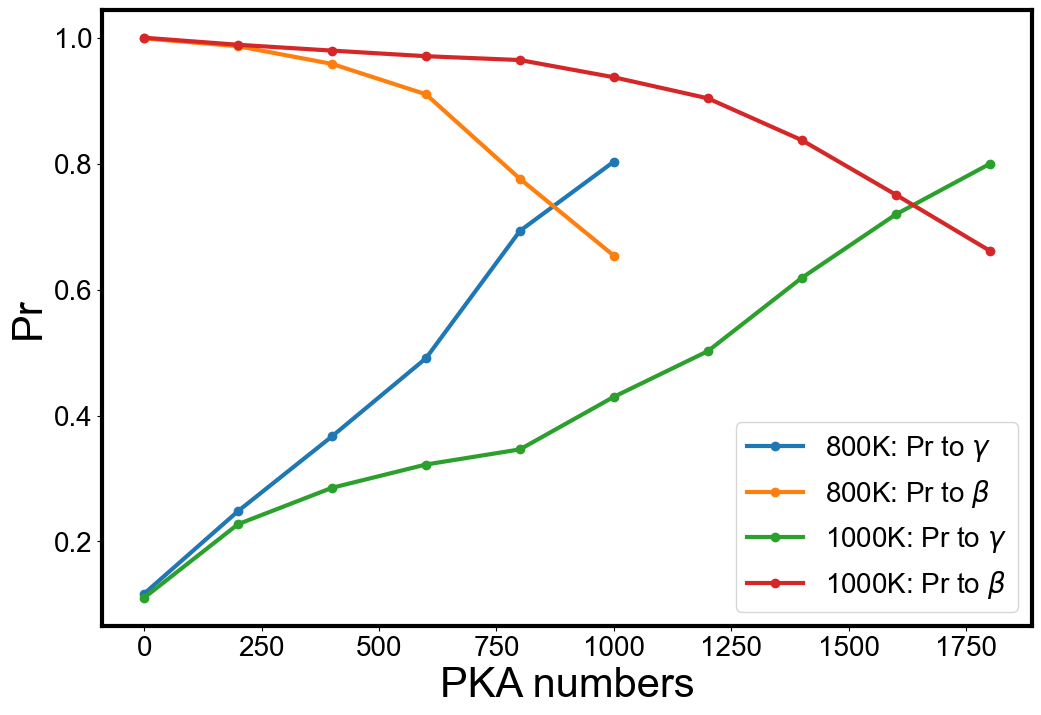

In [39]:
path1='/Users/ruhe/Desktop/ga2o3/overlapping/cascade_anneal/800Ksmall1500ev/gardf'
os.chdir(path1)
gammardf=pd.read_csv('gamma', sep=' ',skiprows=1)
gammardf=gammardf[(gammardf.iloc[:, 0] > 4.0) & (gammardf.iloc[:, 0] < 5.2)]
betardf=pd.read_csv('beta', sep=' ',skiprows=1)
betardf=betardf[(betardf.iloc[:, 0] > 4.0) & (betardf.iloc[:, 0] < 5.2)]
pkal1500=[i for i in range(0,1200,200) ]

pr1500_gamma=np.zeros(len(pkal1500))
pr1500_beta=np.zeros(len(pkal1500))
dpa1500=np.zeros(len(pkal1500))
for i in range(len(pkal1500)):
    dpa1500[i]=DPA(1500,pkal1500[i]+1,193.294,160000,TDEga2o3)
#pearson_anneal1500=np.zeros(len(pkal1500))
for j in range(len(pkal1500)):
#for i in [50]:
    i=pkal1500[j]
    f='pka.'+str(i)
    rdf=pd.read_csv(f, sep=' ',skiprows=1)
    rdf=rdf[(rdf.iloc[:, 0] > 4.0) & (rdf.iloc[:, 0] < 5.2)]
   # plt.plot(rdf.iloc[:,0],rdf.iloc[:,1]+i/100,label=f)    
    #f='anneal'+str(i)+'pka'
    #rdf_anneal=pd.read_csv(f, sep=' ',skiprows=1)
    #rdf_anneal=rdf_anneal[(rdf_anneal.iloc[:, 0] > 4.0) & (rdf_anneal.iloc[:, 0] < 5.2)]
    #plt.plot(rdf_anneal.iloc[:,0],rdf.iloc[:,1]+i/100+0.2,label=f)
    pr1500_gamma[j]=stats.pearsonr(rdf.iloc[:,1], gammardf.iloc[:,1])[0]
    pr1500_beta[j]=stats.pearsonr(rdf.iloc[:,1], betardf.iloc[:,1])[0]
    #pearson_anneal1500[j]=stats.pearsonr(rdf_anneal.iloc[:,1], gammardf.iloc[:,1])[0]
plt.plot(pkal1500, pr1500_gamma,'-o',label=r'800K: Pr to $\gamma$',linewidth=3)
plt.plot(pkal1500, pr1500_beta,'-o',label=r'800K: Pr to $\beta$',linewidth=3)
plt.xlabel('dpa',fontsize=30)
plt.ylabel('Pr',fontsize=30)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["figure.figsize"] = (12,8)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.rcParams["font.family"] = "arial"
path2='/Users/ruhe/Desktop/ga2o3/overlapping/cascade_anneal/small1500ev/gardf'
os.chdir(path2)
gammardf=pd.read_csv('gamma', sep=' ',skiprows=1)
gammardf=gammardf[(gammardf.iloc[:, 0] > 4.0) & (gammardf.iloc[:, 0] < 5.2)]
betardf=pd.read_csv('beta', sep=' ',skiprows=1)
betardf=betardf[(betardf.iloc[:, 0] > 4.0) & (betardf.iloc[:, 0] < 5.2)]
pkal1500=[i for i in range(0,1900,200) ]

pr1500_gamma=np.zeros(len(pkal1500))
pr1500_beta=np.zeros(len(pkal1500))
dpa1500=np.zeros(len(pkal1500))
for i in range(len(pkal1500)):
    dpa1500[i]=DPA(1500,pkal1500[i]+1,193.294,160000,TDEga2o3)
#pearson_anneal1500=np.zeros(len(pkal1500))
for j in range(len(pkal1500)):
#for i in [50]:
    i=pkal1500[j]
    f='pka.'+str(i)
    rdf=pd.read_csv(f, sep=' ',skiprows=1)
    rdf=rdf[(rdf.iloc[:, 0] > 4.0) & (rdf.iloc[:, 0] < 5.2)]
    pr1500_gamma[j]=stats.pearsonr(rdf.iloc[:,1], gammardf.iloc[:,1])[0]
    pr1500_beta[j]=stats.pearsonr(rdf.iloc[:,1], betardf.iloc[:,1])[0]
plt.plot(pkal1500, pr1500_gamma,'-o',label=r'1000K: Pr to $\gamma$',linewidth=3)
plt.plot(pkal1500, pr1500_beta,'-o',label=r'1000K: Pr to $\beta$',linewidth=3)
plt.xlabel('PKA numbers',fontsize=30)
plt.ylabel('Pr',fontsize=30)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["figure.figsize"] = (12,8)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.rcParams["font.family"] = "arial"

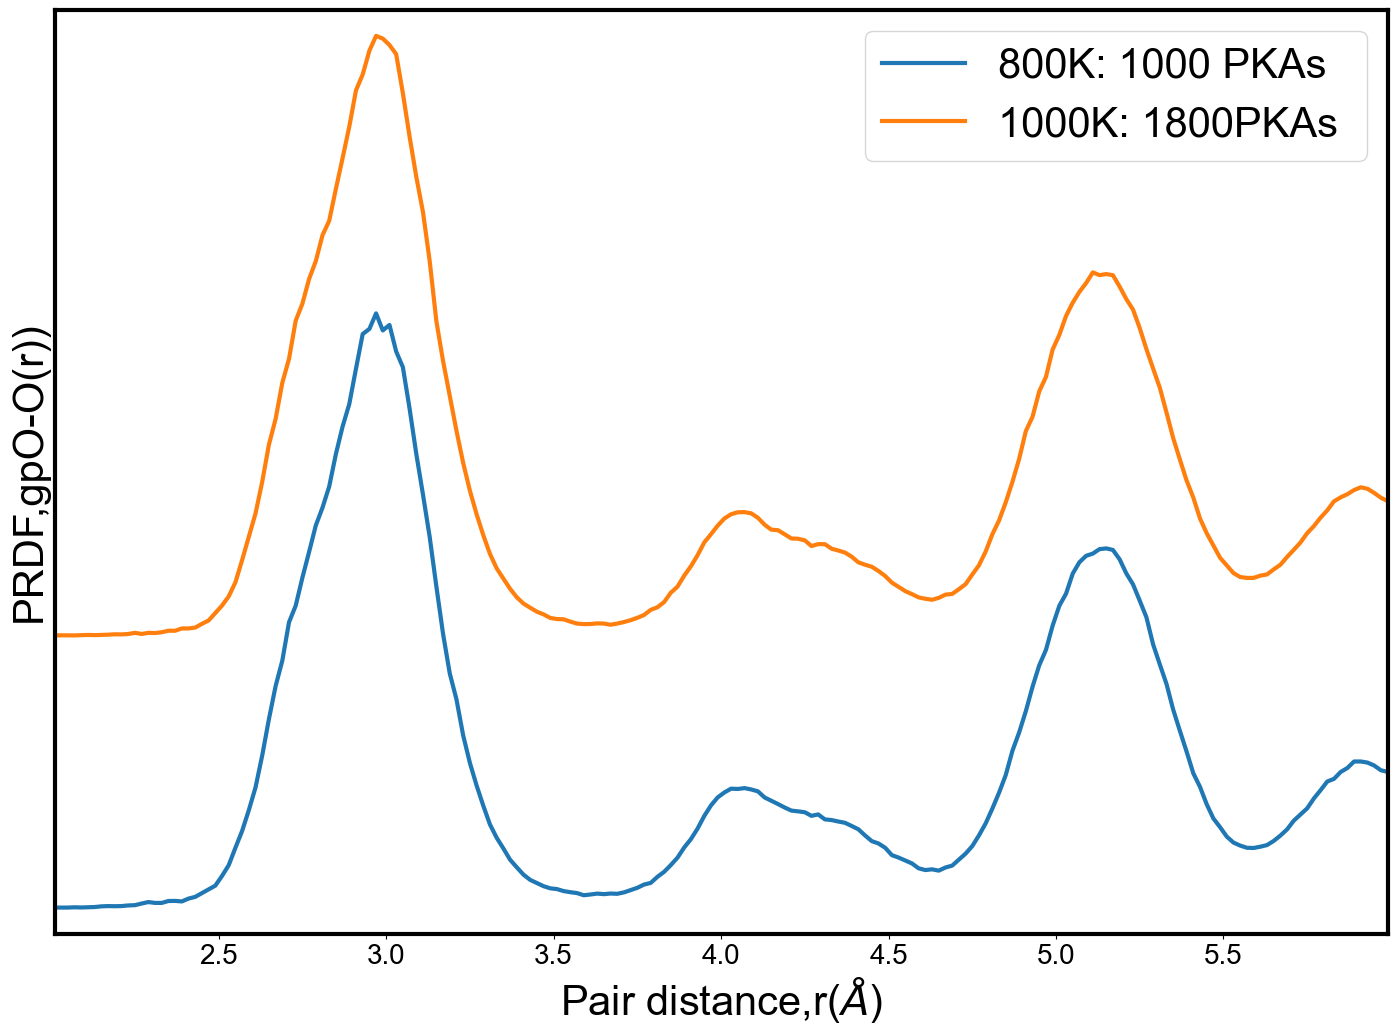

In [29]:
path3='/Users/ruhe/Desktop/ga2o3/overlapping/cascade_anneal/800Ksmall1500ev/Ordf'
path4='/Users/ruhe/Desktop/ga2o3/overlapping/cascade_anneal/small1500ev/Ordf'
pka1000_800k=pd.read_csv(os.path.join(path3, 'pka.1000'), sep=' ',skiprows=1)
pka1800_1000k=pd.read_csv(os.path.join(path4, 'pka.1800'), sep=' ',skiprows=1)
plt.plot(pka1000_800k.iloc[100:,0],pka1000_800k.iloc[100:,1],label=r'800K: 1000 PKAs',linewidth=3)
plt.plot(pka1800_1000k.iloc[100:,0],pka1800_1000k.iloc[100:,1]+2,label=r'1000K: 1800PKAs ',linewidth=3)
plt.xlabel('Pair distance,r($\AA$)',fontsize=30)
plt.ylabel('PRDF,gpO-O(r))',fontsize=30)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["figure.figsize"] = (17.2,12)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.yticks([])
plt.margins(x=0)
plt.margins(y=0.03)
#plt.ylabel('PRDF,$g_{p}$Ga-Ga(r)', labelpad=10, fontsize=30)
plt.rcParams["font.family"] = "arial"
plt.legend(fontsize=30)

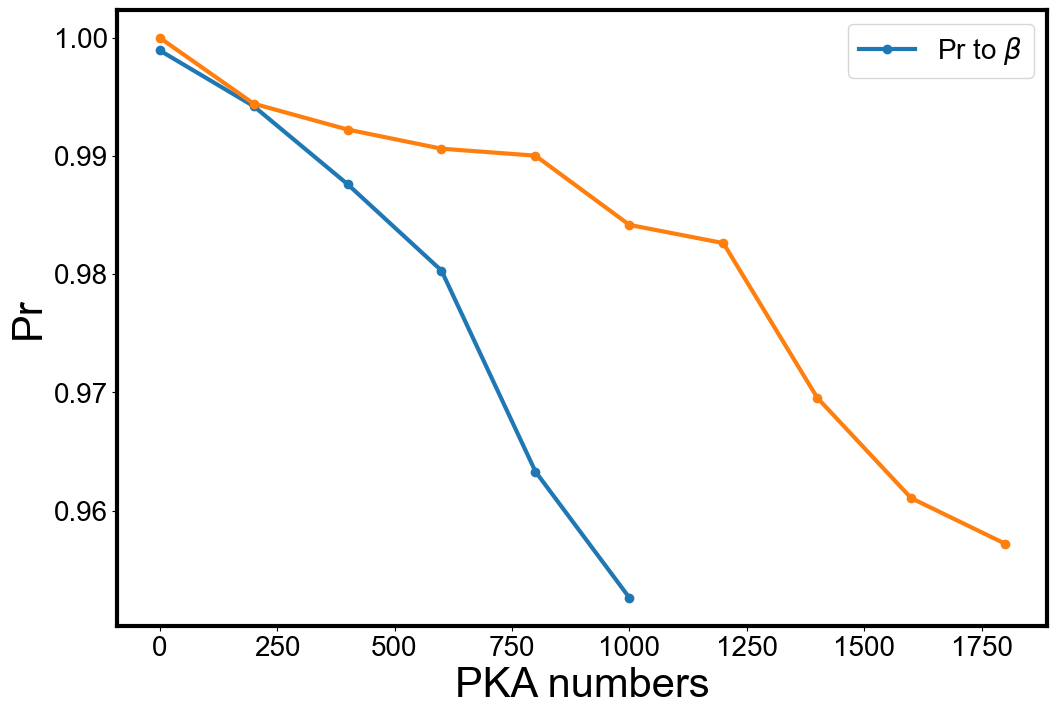

In [35]:
# O RDF analysis
os.chdir(path3)
betardf=pd.read_csv('beta', sep=' ',skiprows=1)
betardf=betardf[(betardf.iloc[:, 0] > 3.6) & (betardf.iloc[:, 0] < 4.6)]
pkal500=[i for i in range(0,1001,200) ]
pr500_beta=np.zeros(len(pkal500))
dpa500=np.zeros(len(pkal500))
for i in range(len(pkal500)):
    dpa500[i]=DPA(1500,pkal500[i]+1,63.563,81920,TDEga2o3)
for j in range(len(pkal500)):
    i=pkal500[j]
    f='pka.'+str(i)
    rdf=pd.read_csv(f, sep=' ',skiprows=1)
    rdf=rdf[(rdf.iloc[:, 0] > 3.6) & (rdf.iloc[:, 0] < 4.6)]
    #plt.plot(rdf.iloc[:,0],rdf.iloc[:,1]+i/100,label=f)    
    #pr500_gamma[j]=stats.pearsonr(rdf.iloc[:,1], gammardf.iloc[:,1])[0]
    pr500_beta[j]=stats.pearsonr(rdf.iloc[:,1], betardf.iloc[:,1])[0]
#plt.plot(dpa500, pr500_gamma,'-o',label=r'Pr to $\gamma$',linewidth=3)
plt.plot(pkal500, pr500_beta,'-o',label=r'Pr to $\beta$',linewidth=3)
plt.xlabel('PKA numbers',fontsize=30)
plt.ylabel('Pr',fontsize=30)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["figure.figsize"] = (12,8)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.rcParams["font.family"] = "arial"
os.chdir(path4)
betardf=pd.read_csv('beta', sep=' ',skiprows=1)
betardf=betardf[(betardf.iloc[:, 0] > 3.6) & (betardf.iloc[:, 0] < 4.6)]
pkal500=[i for i in range(0,1900,200) ]
pr500_beta=np.zeros(len(pkal500))
dpa500=np.zeros(len(pkal500))
for i in range(len(pkal500)):
    dpa500[i]=DPA(1500,pkal500[i]+1,63.563,81920,TDEga2o3)
for j in range(len(pkal500)):
    i=pkal500[j]
    f='pka.'+str(i)
    rdf=pd.read_csv(f, sep=' ',skiprows=1)
    rdf=rdf[(rdf.iloc[:, 0] > 3.6) & (rdf.iloc[:, 0] < 4.6)]
    #plt.plot(rdf.iloc[:,0],rdf.iloc[:,1]+i/100,label=f)    
    #pr500_gamma[j]=stats.pearsonr(rdf.iloc[:,1], gammardf.iloc[:,1])[0]
    pr500_beta[j]=stats.pearsonr(rdf.iloc[:,1], betardf.iloc[:,1])[0]
#plt.plot(dpa500, pr500_gamma,'-o',label=r'Pr to $\gamma$',linewidth=3)
plt.plot(pkal500, pr500_beta,'-o',label=r'Pr to $\beta$',linewidth=3)